In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import csv
import first
import thinkstats2
import thinkplot
import pandas as pd
import statistics
from scipy import stats
import statsmodels.formula.api as smf
import patsy
import matplotlib.pyplot as plt



In [2]:
moviedata = pd.read_csv('movies2.csv', encoding='latin-1') #importing data

In [3]:
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6820 non-null   float64
 1   company   6820 non-null   object 
 2   country   6820 non-null   object 
 3   director  6820 non-null   object 
 4   genre     6820 non-null   object 
 5   gross     6820 non-null   float64
 6   name      6820 non-null   object 
 7   rating    6820 non-null   object 
 8   released  6820 non-null   object 
 9   runtime   6820 non-null   int64  
 10  score     6820 non-null   float64
 11  star      6820 non-null   object 
 12  votes     6820 non-null   int64  
 13  writer    6820 non-null   object 
 14  year      6820 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


In [4]:
md_usa = moviedata[moviedata.country == 'USA'] #cleaning out international films
md_usa.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


7000.0 2
15000.0 2
20000.0 1
22769.0 1
23000.0 1
25000.0 1
38000.0 1
42000.0 1
50000.0 3
60000.0 2
300000000.0 1
260000000.0 1
258000000.0 1
250000000.0 5
245000000.0 1
230000000.0 1
225000000.0 5
220000000.0 1
215000000.0 2
210000000.0 1


Text(0, 0.5, 'Frequency')

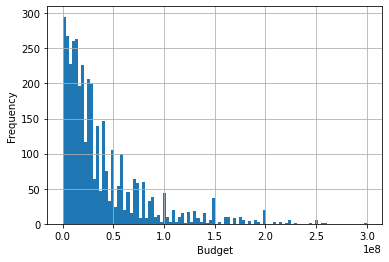

In [5]:
md_usa_bud = md_usa[md_usa.budget > 0] #cleaning out budgets of zero and checking for outliers
hist = thinkstats2.Hist(md_usa_bud.budget)
for budget, freq in hist.Smallest(10):
    print(budget, freq)
for budget, freq in hist.Largest(10):
    print(budget, freq)
md_usa_bud.budget.hist(bins = 100)
plt.xlabel('Budget')
plt.ylabel('Frequency')

309.0 1
1434.0 1
1785.0 1
1800.0 1
1887.0 1
2034.0 1
2760.0 1
2964.0 1
2970.0 1
3045.0 1
936662225.0 1
658672302.0 1
652270625.0 1
623357910.0 1
534858444.0 1
532177324.0 1
486295561.0 1
474544677.0 1
459005868.0 1
436471036.0 1


Text(0, 0.5, 'Frequency')

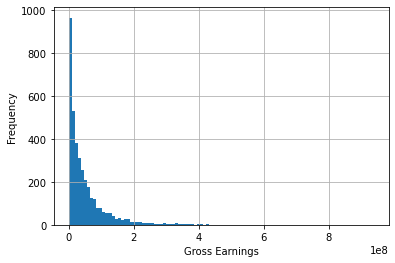

In [6]:
hist2 = thinkstats2.Hist(md_usa_bud.gross) #checking for gross outliers
for gross, freq in hist2.Smallest(10):
    print(gross, freq)
for gross, freq in hist2.Largest(10):
    print(gross, freq)
md_usa_bud.gross.hist(bins = 100) #histogram of number of gross
plt.xlabel('Gross Earnings')
plt.ylabel('Frequency')

In [7]:
md_usa_r = md_usa_bud[md_usa_bud.rating == 'R'] #seperating by rating
md_usa_pg13 = md_usa_bud[md_usa_bud.rating == 'PG-13']
md_usa_pg = md_usa_bud[md_usa_bud.rating == 'PG']
md_usa_g = md_usa_bud[md_usa_bud.rating == 'G']

Text(0, 0.5, 'Frequency')

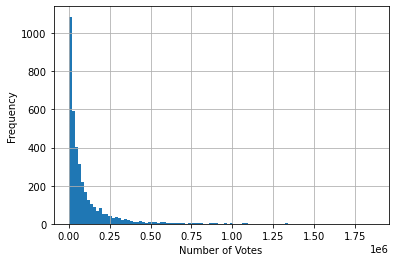

In [8]:
md_usa_bud.votes.hist(bins = 100) #histogram of number of votes
plt.xlabel('Number of Votes')
plt.ylabel('Frequency') #histogram of number of votes

69 1
72 3
73 2
74 2
75 2
76 7
77 6
78 4
79 6
80 11
271 1
219 1
202 1
201 1
195 1
194 1
192 1
191 2
189 2
188 1


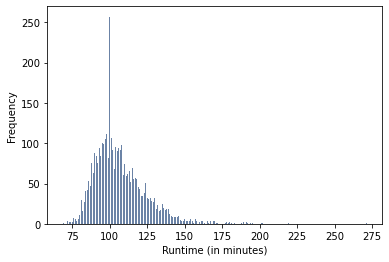

In [9]:
hist2 = thinkstats2.Hist(md_usa_bud.runtime) #checking for runtime outliers
for runtime, freq in hist2.Smallest(10):
    print(runtime, freq)
for runtime, freq in hist2.Largest(10):
    print(runtime, freq)
md_usa_run_hist = thinkstats2.Hist(md_usa_bud.runtime) #histogram for runtime
thinkplot.hist(md_usa_run_hist)
thinkplot.Config(xlabel='Runtime (in minutes)', ylabel='Frequency')

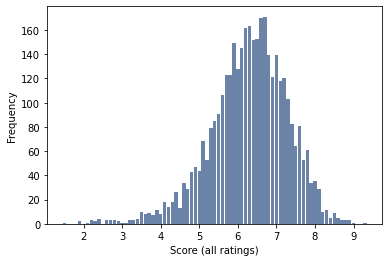

In [10]:
md_usa_score_hist = thinkstats2.Hist(md_usa_bud.score)
thinkplot.hist(md_usa_score_hist) #histogram for the score
thinkplot.Config(xlabel='Score (all ratings)', ylabel='Frequency')

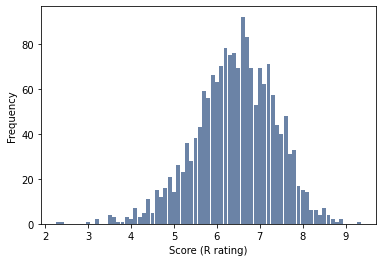

In [11]:
md_usa_r_hist = thinkstats2.Hist(md_usa_r.score) #histogram of score r rating
thinkplot.hist(md_usa_r_hist)
thinkplot.Config(xlabel='Score (R rating)', ylabel='Frequency')

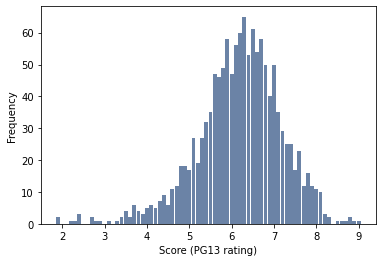

In [12]:
md_usa_pg13_hist = thinkstats2.Hist(md_usa_pg13.score) #histogram of score with pg13 rating
thinkplot.hist(md_usa_pg13_hist)
thinkplot.Config(xlabel='Score (PG13 rating)', ylabel='Frequency')

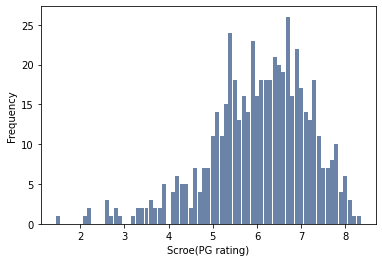

In [13]:
md_usa_pg_hist = thinkstats2.Hist(md_usa_pg.score) #hostogram of score with pg rating
thinkplot.hist(md_usa_pg_hist)
thinkplot.Config(xlabel='Scroe(PG rating)', ylabel='Frequency')

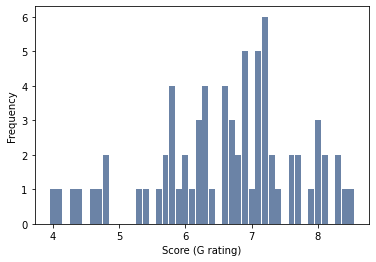

In [14]:
md_usa_g_hist = thinkstats2.Hist(md_usa_g.score) #histogram of score with g rating
thinkplot.hist(md_usa_g_hist)
thinkplot.Config(xlabel='Score (G rating)', ylabel='Frequency')

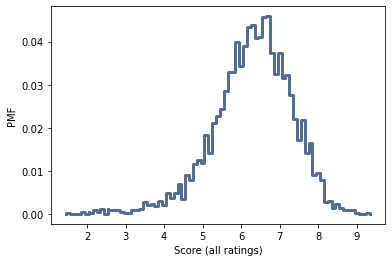

In [15]:
md_usa_bud_pmf = thinkstats2.Pmf(md_usa_bud.score) 
thinkplot.pmf(md_usa_bud_pmf)
thinkplot.Config(xlabel='Score (all ratings)', ylabel='PMF')

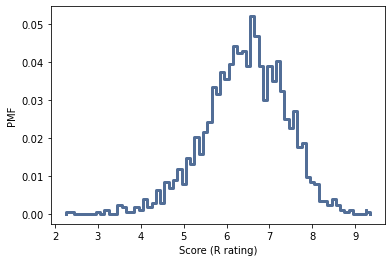

In [16]:
md_usa_r_pmf = thinkstats2.Pmf(md_usa_r.score) 
thinkplot.pmf(md_usa_r_pmf)
thinkplot.Config(xlabel='Score (R rating)', ylabel='PMF')

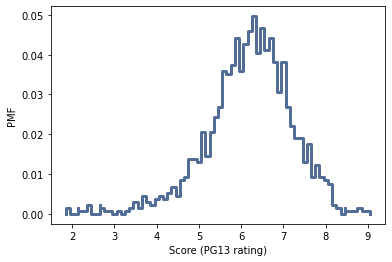

In [17]:
md_usa_pg13_pmf = thinkstats2.Pmf(md_usa_pg13.score)
thinkplot.pmf(md_usa_pg13_pmf)
thinkplot.Config(xlabel='Score (PG13 rating)', ylabel='PMF')

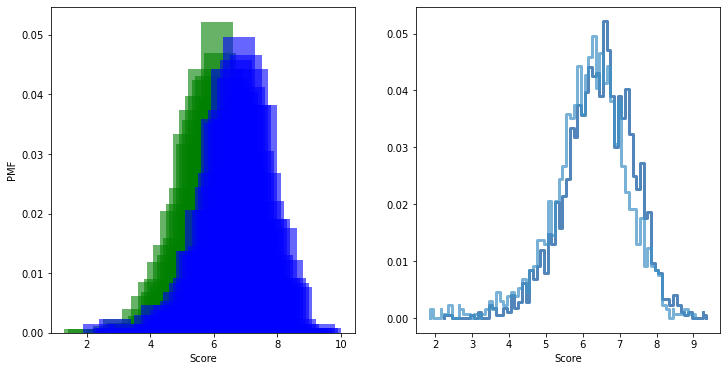

<Figure size 576x432 with 0 Axes>

In [18]:
thinkplot.PrePlot(2, cols = 2) #comparing two ratings based on their score the score for r and pg13
thinkplot.Hist(md_usa_r_pmf, align='right', width = 1, color = "green")
thinkplot.Hist(md_usa_pg13_pmf, align='left', width = 1, color = "blue")
thinkplot.Config(xlabel='Score', ylabel='PMF')
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([md_usa_r_pmf, md_usa_pg13_pmf])
thinkplot.Show(xlabel='Score')

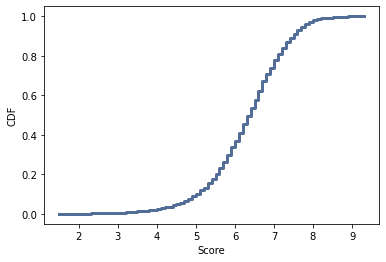

In [19]:
score_cdf = thinkstats2.Cdf(md_usa_bud.score)
thinkplot.Cdf(score_cdf)
thinkplot.Config(xlabel='Score', ylabel='CDF')

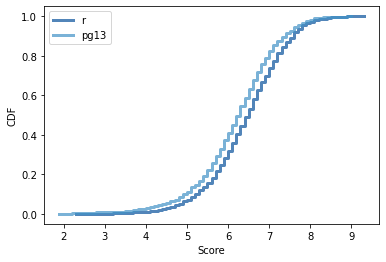

In [20]:
r_cdf = thinkstats2.Cdf(md_usa_r.score, label='r')
pg13_cdf = thinkstats2.Cdf(md_usa_pg13.score, label='pg13')

thinkplot.PrePlot(2)
thinkplot.Cdfs([r_cdf, pg13_cdf])
thinkplot.Config(xlabel='Score', ylabel='CDF')

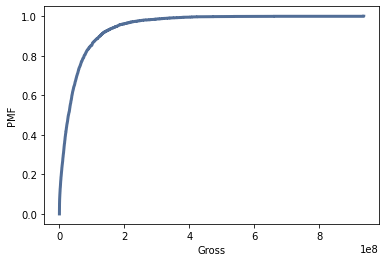

In [21]:
gross_bud_cdf = thinkstats2.Cdf(md_usa_bud.gross)
thinkplot.Cdf(gross_bud_cdf)
thinkplot.Config(xlabel='Gross', ylabel='PMF')

In [22]:
print('The mean is ', round(md_usa_bud.gross.mean(), 2), 'The variance is ', round(md_usa_bud.gross.var(), 2),
      'The standard deviation is ', round(md_usa_bud.gross.std(), 2)) #stats gross

The mean is  50031178.03 The variance is  4574995235211193.0 The standard deviation is  67638711.07


In [23]:
print('The mean is ', round(md_usa_bud.score.mean(), 2), 'The variance is ', round(md_usa_bud.score.var(), 2),
      'The standard deviation is ', round(md_usa_bud.score.std(), 2)) #stats score

The mean is  6.29 The variance is  1.0 The standard deviation is  1.0


In [24]:
print('The mean is ', round(md_usa_bud.runtime.mean(), 2), 'The variance is ', round(md_usa_bud.runtime.var(), 2),
      'The standard deviation is ', round(md_usa_bud.runtime.std(), 2)) #stats runtime

The mean is  106.8 The variance is  299.38 The standard deviation is  17.3


In [25]:
print('The mean is ', round(md_usa_bud.budget.mean(), 2), 'The variance is ', round(md_usa_bud.budget.var(), 2),
      'The standard deviation is ', round(md_usa_bud.budget.std(), 2)) #stats budget

The mean is  37559962.44 The variance is  1646871742493711.0 The standard deviation is  40581667.57


In [26]:

t = {'Rating':['R', 'PG13', 'PG', 'G'], 
     'gross mean': [round(md_usa_r.gross.mean(),2), round(md_usa_pg13.gross.mean(), 2), round(md_usa_pg.gross.mean(), 2), round(md_usa_g.gross.mean(), 2)], 
     'gross variance': [round(md_usa_r.gross.var(), 2), round(md_usa_pg13.gross.var(), 2), round(md_usa_pg.gross.var(), 2), round(md_usa_g.gross.var(), 2)], 
     'gross standard deviation': [round(md_usa_r.gross.std(), 2), round(md_usa_pg13.gross.std(), 2), round(md_usa_pg.gross.std(), 2), round(md_usa_g.gross.std(), 2)]}
Rating_df = pd.DataFrame(data = t)
Rating_df

,Rating,gross mean,gross variance,gross standard deviation
0,R,3.081202e+07,1.583968e+15,39799098.17
1,PG13,6.562071e+07,6.919477e+15,83183392.42
2,PG,6.979796e+07,5.685418e+15,75401711.10
3,G,1.070111e+08,8.252619e+15,90843924.91


In [27]:
score = {'Score':['R', 'PG13', 'PG', 'G'], 
     'score mean': [round(md_usa_r.score.mean(),2), round(md_usa_pg13.score.mean(), 2), round(md_usa_pg.score.mean(), 2), round(md_usa_g.score.mean(), 2)], 
     'score variance': [round(md_usa_r.score.var(), 2), round(md_usa_pg13.score.var(), 2), round(md_usa_pg.score.var(), 2), round(md_usa_g.score.var(), 2)], 
     'score standard deviation': [round(md_usa_r.score.std(), 2), round(md_usa_pg13.score.std(), 2), round(md_usa_pg.score.std(), 2), round(md_usa_g.score.std(), 2)]}
score_df = pd.DataFrame(data = score)
score_df

,Score,score mean,score variance,score standard deviation
0,R,6.43,0.86,0.93
1,PG13,6.19,0.99,0.99
2,PG,6.05,1.31,1.14
3,G,6.60,1.17,1.08


In [28]:
md_usa_r.gross.mean(), md_usa_r.gross.var(), md_usa_r.gross.std() #stats r gross

(30812020.708215296, 1583968215489517.8, 39799098.174324475)

In [29]:
md_usa_r.score.mean(), md_usa_r.score.var(), md_usa_r.score.std() #stats r score

(6.429518413597741, 0.8590431352899992, 0.9268457990895784)

In [30]:
md_usa_pg13.score.mean(), md_usa_pg13.score.var(), md_usa_pg13.score.std() #stats pg13 score

(6.1864782276547, 0.9888613643956392, 0.9944150865688026)

In [31]:
md_usa_pg13.gross.mean(), md_usa_pg13.gross.var(), md_usa_pg13.gross.std() #stats pg13 gross

(65620707.66080978, 6919476773860429.0, 83183392.41615738)

In [32]:
md_usa_pg.gross.mean(), md_usa_pg.gross.var(), md_usa_pg.gross.std() #stats pg gross

(69797959.18363637, 5685418036938828.0, 75401711.10086845)

In [33]:
md_usa_pg.score.mean(), md_usa_pg.score.var(), md_usa_pg.score.std() #stats pg score

(6.049818181818186, 1.3108469614174507, 1.1449222512544033)

In [34]:
md_usa_g.gross.mean(), md_usa_g.gross.var(), md_usa_g.gross.std() #stats g gross

(107011065.1388889, 8252618692557631.0, 90843924.90726957)

In [35]:
md_usa_g.score.mean(), md_usa_g.score.var(), md_usa_g.score.std() #stats g score

(6.601388888888891, 1.1654910015649453, 1.0795790853684344)

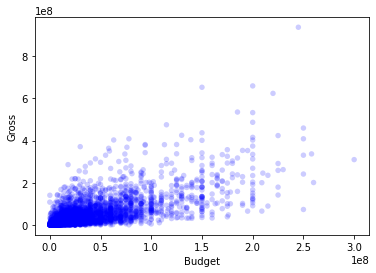

<Figure size 576x432 with 0 Axes>

In [36]:
thinkplot.Scatter(md_usa_bud.budget, md_usa_bud.gross)
thinkplot.Show(xlabel = "Budget", ylabel = "Gross")

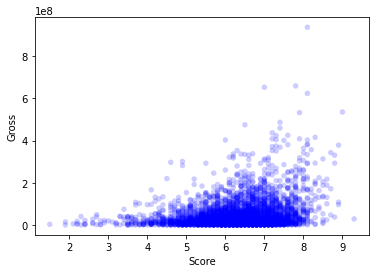

<Figure size 576x432 with 0 Axes>

In [37]:
thinkplot.Scatter(md_usa_bud.score, md_usa_bud.gross)
thinkplot.Show(xlabel = "Score", ylabel = "Gross")

In [38]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [39]:
budget = md_usa_bud.budget
gross = md_usa_bud.gross
score = md_usa_bud.score
runtime = md_usa_bud.runtime
Cov(budget, gross)

1845859588418454.5

In [40]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [41]:
Corr(budget, gross)

0.672651358065712

In [42]:
Corr(score, gross)

0.27017542641802594

In [43]:
#using lognormal distribution for the gross of the movies
def MakeNormalModel(gross):
    cdf = thinkstats2.Cdf(gross, label='gross')

    mean, var = thinkstats2.TrimmedMeanVar(gross)
    std = np.sqrt(var)
    print('n, mean, std', len(gross), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

n, mean, std 3726 46686282.10733844 54965578.54687879


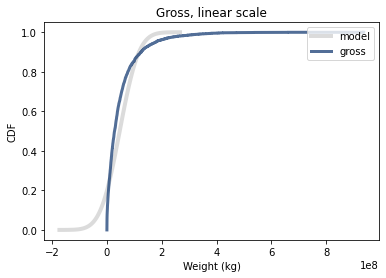

In [44]:
MakeNormalModel(gross)
thinkplot.Config(title='Gross, linear scale', xlabel='Weight (kg)',
                 ylabel='CDF', loc='upper right')

n, mean, std 3726 7.272202979200155 0.7768804247590311


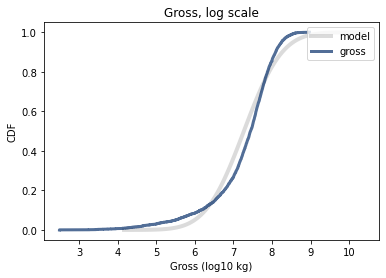

In [45]:
log_gross = np.log10(gross)
MakeNormalModel(log_gross)
thinkplot.Config(title='Gross, log scale', xlabel='Gross (log10 kg)',
                 ylabel='CDF', loc='upper right')

In [46]:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [47]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

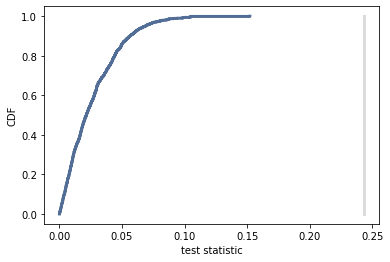

<Figure size 576x432 with 0 Axes>

In [48]:
data = md_usa_r.score, md_usa_pg13.score
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue
ht.PlotCdf()
thinkplot.Show(xlabel = 'test statistic', ylabel = 'CDF')

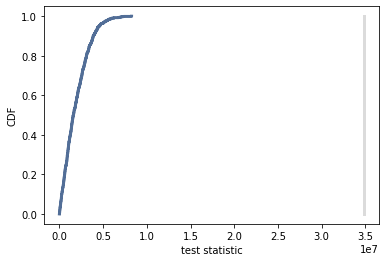

<Figure size 576x432 with 0 Axes>

In [49]:
data = md_usa_r.gross, md_usa_pg13.gross
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
ht.PlotCdf()
thinkplot.Show(xlabel = 'test statistic', ylabel = 'CDF')

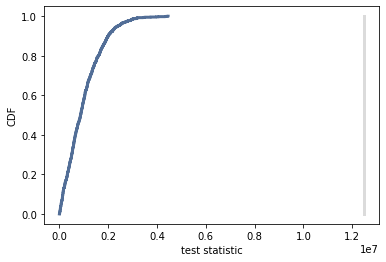

<Figure size 576x432 with 0 Axes>

In [50]:
data = md_usa_bud.budget, md_usa_bud.gross
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue
ht.PlotCdf()
thinkplot.Show(xlabel = 'test statistic', ylabel = 'CDF')

In [51]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [52]:
data = md_usa_bud.budget, md_usa_bud.gross
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [53]:
from thinkstats2 import Mean, MeanVar, Var, Std, Cov

def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

In [54]:
inter, slope = LeastSquares(budget, gross)
inter, slope

(7921627.414220706, 1.1211286668858007)

In [55]:
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

In [56]:
fit_xs, fit_ys = FitLine(budget, inter, slope)

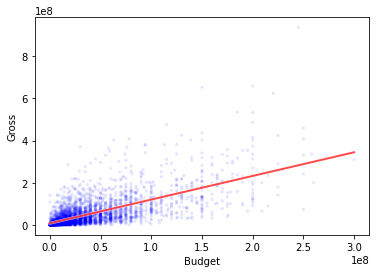

In [57]:
thinkplot.Scatter(budget, gross, color='blue', alpha = 0.1, s = 10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Budget",
                 ylabel='Gross',
                 legend=False)

In [58]:
inter, slope = LeastSquares(score, gross)
inter, slope

(-65042317.23976924, 18288929.88655387)

In [59]:
fit_xs, fit_ys = FitLine(score, inter, slope)

In [60]:
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

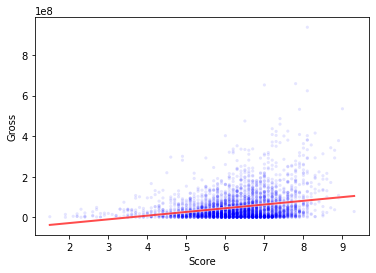

In [61]:
thinkplot.Scatter(score, gross, color='blue', alpha = .1, s = 10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Score",
                 ylabel='Gross',
                 legend=False)

In [62]:
import statsmodels.formula.api as smf

formula = 'gross ~ budget'
model = smf.ols(formula, data=md_usa_bud)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     3077.
Date:                Sat, 06 Mar 2021   Prob (F-statistic):               0.00
Time:                        09:38:10   Log-Likelihood:                -71343.
No. Observations:                3726   AIC:                         1.427e+05
Df Residuals:                    3724   BIC:                         1.427e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.922e+06   1.12e+06      7.089      0.000    5.73e+06    1.01e+07
budget         1.1211      0.020     55.474      0.000       1.082       1.161
==============================================================================
Omnibus:                     2440.214   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60019.793
Skew:                           2.730   Prob(JB):                         0.00
Kurtosis:                      21.889   Cond. No.                     7.53e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.53e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
formula = 'gross ~ score'
model = smf.ols(formula, data=md_usa_bud)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     293.2
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           2.46e-63
Time:                        09:38:10   Log-Likelihood:                -72324.
No. Observations:                3726   AIC:                         1.447e+05
Df Residuals:                    3724   BIC:                         1.447e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.504e+07    6.8e+06     -9.559      0.000   -7.84e+07   -5.17e+07
score       1.829e+07   1.07e+06     17.124      0.000    1.62e+07    2.04e+07
==============================================================================
Omnibus:                     2694.431   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62725.283
Skew:                           3.191   Prob(JB):                         0.00
Kurtosis:                      22.060   Cond. No.                         41.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
formula = 'gross ~ score + budget + runtime'
model = smf.ols(formula, data=md_usa_bud)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     1209.
Date:                Sat, 06 Mar 2021   Prob (F-statistic):               0.00
Time:                        09:38:10   Log-Likelihood:                -71197.
No. Observations:                3726   AIC:                         1.424e+05
Df Residuals:                    3722   BIC:                         1.424e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.177e+07   5.97e+06    -12.018      0.000   -8.35e+07   -6.01e+07
score       1.433e+07   8.66e+05     16.548      0.000    1.26e+07     1.6e+07
budget         1.0976      0.021     53.157      0.000       1.057       1.138
runtime    -8.965e+04   5.28e+04     -1.699      0.089   -1.93e+05    1.38e+04
==============================================================================
Omnibus:                     2413.442   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60614.276
Skew:                           2.678   Prob(JB):                         0.00
Kurtosis:                      22.019   Cond. No.                     4.20e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
formula = 'gross ~ rating'
model = smf.ols(formula, data=md_usa_bud)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     50.88
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           1.44e-69
Time:                        09:38:10   Log-Likelihood:                -72295.
No. Observations:                3726   AIC:                         1.446e+05
Df Residuals:                    3718   BIC:                         1.447e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 1.07e+08   7.62e+06     14.040      0.000    9.21e+07    1.22e+08
rating[T.NC-17]         -1.049e+08   2.99e+07     -3.508      0.000   -1.64e+08   -4.63e+07
rating[T.NOT RATED]     -1.067e+08   1.95e+07     -5.473      0.000   -1.45e+08   -6.85e+07
rating[T.Not specified] -1.043e+08   6.51e+07     -1.602      0.109   -2.32e+08    2.34e+07
rating[T.PG]            -3.721e+07   8.11e+06     -4.591      0.000   -5.31e+07   -2.13e+07
rating[T.PG-13]         -4.139e+07   7.83e+06     -5.287      0.000   -5.67e+07    -2.6e+07
rating[T.R]              -7.62e+07   7.78e+06     -9.799      0.000   -9.14e+07    -6.1e+07
rating[T.UNRATED]       -1.048e+08   2.09e+07     -5.006      0.000   -1.46e+08   -6.38e+07
==============================================================================
Omnibus:                     2822.754   Durbin-Watson:                   1.380
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75928.347
Skew:                           3.366   Prob(JB):                         0.00
Kurtosis:                      24.066   Cond. No.                         72.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
formula = 'gross ~ score + budget + runtime + rating'
model = smf.ols(formula, data=md_usa_bud)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     380.2
Date:                Sat, 06 Mar 2021   Prob (F-statistic):               0.00
Time:                        09:38:10   Log-Likelihood:                -71152.
No. Observations:                3726   AIC:                         1.423e+05
Df Residuals:                    3715   BIC:                         1.424e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -5.816e+07   7.99e+06     -7.279      0.000   -7.38e+07   -4.25e+07
rating[T.NC-17]         -4.173e+07   2.21e+07     -1.890      0.059    -8.5e+07    1.57e+06
rating[T.NOT RATED]     -4.178e+07   1.44e+07     -2.895      0.004   -7.01e+07   -1.35e+07
rating[T.Not specified]   -4.7e+07    4.8e+07     -0.980      0.327   -1.41e+08    4.71e+07
rating[T.PG]            -1.414e+07   6.04e+06     -2.340      0.019    -2.6e+07   -2.29e+06
rating[T.PG-13]         -2.022e+07    5.9e+06     -3.428      0.001   -3.18e+07   -8.65e+06
rating[T.R]             -3.249e+07   5.92e+06     -5.491      0.000   -4.41e+07   -2.09e+07
rating[T.UNRATED]       -3.874e+07   1.55e+07     -2.501      0.012   -6.91e+07   -8.38e+06
score                    1.488e+07   8.69e+05     17.113      0.000    1.32e+07    1.66e+07
budget                      1.0173      0.022     46.032      0.000       0.974       1.061
runtime                  1.204e+04   5.41e+04      0.223      0.824    -9.4e+04    1.18e+05
==============================================================================
Omnibus:                     2461.944   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67384.218
Skew:                           2.727   Prob(JB):                         0.00
Kurtosis:                      23.107   Cond. No.                     3.40e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""